In [44]:
# First get information about 'Driver', 'LapNumber', 'LapTime', 'IsPitStop', 'TireCompound'

import fastf1 as ff1


# Load the 2018 Australian Grand Prix Race session
race = ff1.get_session(2019, 'German Grand Prix', 'R')  # 'R' stands for Race
race.load()

# Extract the data for each driver's lap
laps = race.laps

# Select the data you are interested in
data = laps[['Driver', 'LapNumber', 'LapTime', 'IsPersonalBest', 'PitOutTime', 'PitInTime', 'Compound']]

# Add derived columns
data['IsPitStop'] = data['PitInTime'].notnull()  # Binary indicator for pit stop

# Clean up and rename columns for clarity
data_cleaned = data[['Driver', 'LapNumber', 'LapTime', 'IsPitStop', 'Compound']]
data_cleaned.columns = ['Driver', 'LapNumber', 'LapTime', 'IsPitStop', 'TireCompound']

# Display the cleaned data
print(data_cleaned)


core           INFO 	Loading data for German Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '5', '26', '18', '55', '23', '8', '20', '44', '88', '63', '7', '99', '10', '77', '27', '16', '4', '3', '11']


     Driver  LapNumber                LapTime  IsPitStop  TireCompound
0       GAS        1.0 0 days 00:01:51.390000      False           WET
1       GAS        2.0 0 days 00:01:44.193000      False           WET
2       GAS        3.0 0 days 00:02:01.615000       True           WET
3       GAS        4.0 0 days 00:02:19.647000      False  INTERMEDIATE
4       GAS        5.0 0 days 00:01:39.816000      False  INTERMEDIATE
...     ...        ...                    ...        ...           ...
1055    GIO       60.0 0 days 00:01:20.907000      False          SOFT
1056    GIO       61.0 0 days 00:01:18.857000      False          SOFT
1057    GIO       62.0 0 days 00:01:17.507000      False          SOFT
1058    GIO       63.0 0 days 00:01:18.059000      False          SOFT
1059    GIO       64.0 0 days 00:01:18.624000      False          SOFT

[1060 rows x 5 columns]


C:\Users\Pc\AppData\Local\Temp\ipykernel_9556\3951172957.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsPitStop'] = data['PitInTime'].notnull()  # Binary indicator for pit stop


In [45]:
# Then get weather data
race = ff1.get_session(2019, 'German Grand Prix', 'R')  # 'R' stands for Race
race.load()

# Extract the data for each driver's lap

# Access the weather data, which contains the outside temperature and rainfall
weather_data = race.weather_data

core           INFO 	Loading data for German Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '5', '26', '18', '55', '23', '8', '20', '44', '88', '63', '7', '99', '10', '77', '27', '16', '4', '3', '11']


In [46]:
# We see that there is more than one observation for some laps.
weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:38.119000,21.0,87.9,991.1,True,26.4,288,0.8
1,0 days 00:01:38.132000,20.9,89.2,991.1,True,26.2,282,0.6
2,0 days 00:02:38.145000,21.0,88.6,991.1,True,25.9,174,0.5
3,0 days 00:03:38.158000,21.0,88.6,991.2,True,26.0,168,0.0
4,0 days 00:04:38.172000,21.0,88.2,991.0,True,26.0,0,1.3
...,...,...,...,...,...,...,...,...
142,0 days 02:22:40.029000,21.8,86.3,992.2,True,26.9,351,2.2
143,0 days 02:23:40.047000,21.8,86.3,992.2,False,26.6,341,1.2
144,0 days 02:24:40.073000,21.8,87.0,992.2,False,26.6,7,1.2
145,0 days 02:25:40.070000,22.0,87.8,992.3,False,26.9,277,1.4


In [47]:
# Make a function to indicate which laps has what weather.

import pandas as pd

# Extract Vettel's lap data
vettel_laps = data_cleaned[data_cleaned['Driver'] == 'VER'].copy()

# Convert lap times (timedelta format) to total seconds for easier calculations
vettel_laps['LapTimeSeconds'] = vettel_laps['LapTime'].dt.total_seconds()

# Compute the cumulative lap time for each of Vettel's laps
vettel_laps['CumulativeLapTime'] = vettel_laps['LapTimeSeconds'].cumsum()

# Now we need to associate the weather data with Vettel's lap times
# First, convert the weather 'Time' (timedelta format) to total seconds
weather_data['TimeSeconds'] = weather_data['Time'].dt.total_seconds()

# Initialize an empty list to store the lap numbers for each weather observation
lap_corresponding = []

# Loop over each weather observation and find the corresponding lap number
for weather_time in weather_data['TimeSeconds']:
    # For each weather time, find the first lap where the cumulative lap time exceeds the weather time
    lap_number = vettel_laps[vettel_laps['CumulativeLapTime'] >= weather_time]['LapNumber'].min()
    lap_corresponding.append(lap_number)

# Add the corresponding lap number to the weather_data DataFrame
weather_data['CorrespondingLap'] = lap_corresponding

# Display the updated weather data with the corresponding lap numbers
print(weather_data[['Time', 'CorrespondingLap', 'AirTemp', 'Rainfall']])


                      Time  CorrespondingLap  AirTemp  Rainfall
0   0 days 00:00:38.119000               1.0     21.0      True
1   0 days 00:01:38.132000               1.0     20.9      True
2   0 days 00:02:38.145000               2.0     21.0      True
3   0 days 00:03:38.158000               3.0     21.0      True
4   0 days 00:04:38.172000               3.0     21.0      True
..                     ...               ...      ...       ...
142 0 days 02:22:40.029000               NaN     21.8      True
143 0 days 02:23:40.047000               NaN     21.8     False
144 0 days 02:24:40.073000               NaN     21.8     False
145 0 days 02:25:40.070000               NaN     22.0     False
146 0 days 02:26:40.090000               NaN     21.9     False

[147 rows x 4 columns]


In [48]:
weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,TimeSeconds,CorrespondingLap
0,0 days 00:00:38.119000,21.0,87.9,991.1,True,26.4,288,0.8,38.119,1.0
1,0 days 00:01:38.132000,20.9,89.2,991.1,True,26.2,282,0.6,98.132,1.0
2,0 days 00:02:38.145000,21.0,88.6,991.1,True,25.9,174,0.5,158.145,2.0
3,0 days 00:03:38.158000,21.0,88.6,991.2,True,26.0,168,0.0,218.158,3.0
4,0 days 00:04:38.172000,21.0,88.2,991.0,True,26.0,0,1.3,278.172,3.0
...,...,...,...,...,...,...,...,...,...,...
142,0 days 02:22:40.029000,21.8,86.3,992.2,True,26.9,351,2.2,8560.029,NaN
143,0 days 02:23:40.047000,21.8,86.3,992.2,False,26.6,341,1.2,8620.047,NaN
144,0 days 02:24:40.073000,21.8,87.0,992.2,False,26.6,7,1.2,8680.073,NaN
145,0 days 02:25:40.070000,22.0,87.8,992.3,False,26.9,277,1.4,8740.070,NaN


In [49]:
# As seen above there is 
weather_data = weather_data.drop(weather_data.index[104:150])

In [50]:
import pandas as pd

# Assuming your DataFrame is named weather_data

# Create a dummy variable for Rainfall: 1 if rainfall is > 0, else 0
weather_data['RainfallDummy'] = (weather_data['Rainfall'] > 0).astype(int)

# Group by the lap number and calculate the average TrackTemp and Rainfall
grouped_data = weather_data.groupby('CorrespondingLap').agg(
    AvgTrackTemp=('TrackTemp', 'mean'),     # Average track temperature
    AvgRainfall=('RainfallDummy', 'mean')   # Average rainfall (proportion of time it rained)
).reset_index()

# Display the grouped data
print(grouped_data)


    CorrespondingLap  AvgTrackTemp  AvgRainfall
0                1.0     26.300000          1.0
1                2.0     25.900000          1.0
2                3.0     26.000000          1.0
3                4.0     26.166667          1.0
4                5.0     26.400000          1.0
..               ...           ...          ...
59              60.0     26.600000          1.0
60              61.0     27.050000          1.0
61              62.0     27.300000          1.0
62              63.0     27.000000          1.0
63              64.0     26.900000          1.0

[64 rows x 3 columns]


In [51]:
# Assuming the grouped data from weather is named 'grouped_data' 
# and contains 'CorrespondingLap', 'AvgTrackTemp', and 'AvgRainfall'

# Rename 'CorrespondingLap' to 'LapNumber' for easier merging
grouped_data.rename(columns={'CorrespondingLap': 'LapNumber'}, inplace=True)

# Perform the merge on 'LapNumber' (to match the lap data for all drivers)
data_cleaned_with_weather = pd.merge(data_cleaned, grouped_data, on='LapNumber', how='left')

# Display the merged DataFrame
print(data_cleaned_with_weather)


     Driver  LapNumber                LapTime  IsPitStop  TireCompound  \
0       GAS        1.0 0 days 00:01:51.390000      False           WET   
1       GAS        2.0 0 days 00:01:44.193000      False           WET   
2       GAS        3.0 0 days 00:02:01.615000       True           WET   
3       GAS        4.0 0 days 00:02:19.647000      False  INTERMEDIATE   
4       GAS        5.0 0 days 00:01:39.816000      False  INTERMEDIATE   
...     ...        ...                    ...        ...           ...   
1055    GIO       60.0 0 days 00:01:20.907000      False          SOFT   
1056    GIO       61.0 0 days 00:01:18.857000      False          SOFT   
1057    GIO       62.0 0 days 00:01:17.507000      False          SOFT   
1058    GIO       63.0 0 days 00:01:18.059000      False          SOFT   
1059    GIO       64.0 0 days 00:01:18.624000      False          SOFT   

      AvgTrackTemp  AvgRainfall  
0        26.300000          1.0  
1        25.900000          1.0  
2        

In [52]:
# Get missing values.
nat_rows = data_cleaned_with_weather[
    data_cleaned_with_weather[['Driver', 'LapNumber', 'LapTime', 'IsPitStop','TireCompound','AvgTrackTemp','AvgRainfall']].isna().any(axis=1)
]

# Count the number of times each driver appears (i.e., number of laps per driver)
print(nat_rows[['Driver', 'LapNumber', 'LapTime', 'IsPitStop','TireCompound','AvgTrackTemp','AvgRainfall']])


    Driver  LapNumber LapTime  IsPitStop  TireCompound  AvgTrackTemp  \
61     GAS       62.0     NaT      False          SOFT     27.300000   
63     PER        2.0     NaT      False           WET     25.900000   
116    STR       26.0     NaT      False        MEDIUM     26.150000   
386    HUL       40.0     NaT      False  INTERMEDIATE     26.000000   
400    RIC       14.0     NaT      False  INTERMEDIATE     26.000000   
465    VER       65.0     NaT      False          SOFT           NaN   
519    HAM       29.0     NaT       True          SOFT     26.233333   
520    HAM       30.0     NaT      False  INTERMEDIATE     26.500000   
867    BOT       57.0     NaT      False          SOFT     27.200000   
894    GRO       27.0     NaT      False          SOFT     26.250000   

     AvgRainfall  
61           1.0  
63           1.0  
116          1.0  
386          1.0  
400          1.0  
465          NaN  
519          1.0  
520          1.0  
867          1.0  
894          1.0 

In [53]:
# To remove the NA's from the laps where driver dropped out.
data_cleaned_with_weather = data_cleaned_with_weather.fillna(0)


In [54]:
# Final data.
data_cleaned_with_weather

,Driver,LapNumber,LapTime,IsPitStop,TireCompound,AvgTrackTemp,AvgRainfall
0,GAS,1.0,0 days 00:01:51.390000,False,WET,26.300000,1.0
1,GAS,2.0,0 days 00:01:44.193000,False,WET,25.900000,1.0
2,GAS,3.0,0 days 00:02:01.615000,True,WET,26.000000,1.0
3,GAS,4.0,0 days 00:02:19.647000,False,INTERMEDIATE,26.166667,1.0
4,GAS,5.0,0 days 00:01:39.816000,False,INTERMEDIATE,26.400000,1.0
...,...,...,...,...,...,...,...
1055,GIO,60.0,0 days 00:01:20.907000,False,SOFT,26.600000,1.0
1056,GIO,61.0,0 days 00:01:18.857000,False,SOFT,27.050000,1.0
1057,GIO,62.0,0 days 00:01:17.507000,False,SOFT,27.300000,1.0
1058,GIO,63.0,0 days 00:01:18.059000,False,SOFT,27.000000,1.0


In [56]:
import pandas as pd

# Check the data type of the 'LapTime' column
print(data_cleaned_with_weather['LapTime'].dtype)

# If the 'LapTime' column is not already in a datetime-like format, convert it
# Assuming 'LapTime' is a string in 'HH:MM:SS' format, we convert it to a timedelta
if data_cleaned_with_weather['LapTime'].dtype == 'object':
    data_cleaned_with_weather['LapTime'] = pd.to_timedelta(data_cleaned_with_weather['LapTime'], errors='coerce')

# Now convert the 'LapTime' column to total seconds
data_cleaned_with_weather['LapTimeSeconds'] = data_cleaned_with_weather['LapTime'].dt.total_seconds()

# Script to print the length of each column (non-null values and total entries)
for column in data_cleaned_with_weather.columns:
    print(f"Column '{column}' has {data_cleaned_with_weather[column].notna().sum()} non-null entries and {len(data_cleaned_with_weather[column])} total entries.")


object
Column 'Driver' has 1060 non-null entries and 1060 total entries.
Column 'LapNumber' has 1060 non-null entries and 1060 total entries.
Column 'LapTime' has 1060 non-null entries and 1060 total entries.
Column 'IsPitStop' has 1060 non-null entries and 1060 total entries.
Column 'TireCompound' has 1060 non-null entries and 1060 total entries.
Column 'AvgTrackTemp' has 1060 non-null entries and 1060 total entries.
Column 'AvgRainfall' has 1060 non-null entries and 1060 total entries.
Column 'LapTimeSeconds' has 1060 non-null entries and 1060 total entries.


<Axes: xlabel='LapNumber', ylabel='LapTimeSeconds'>

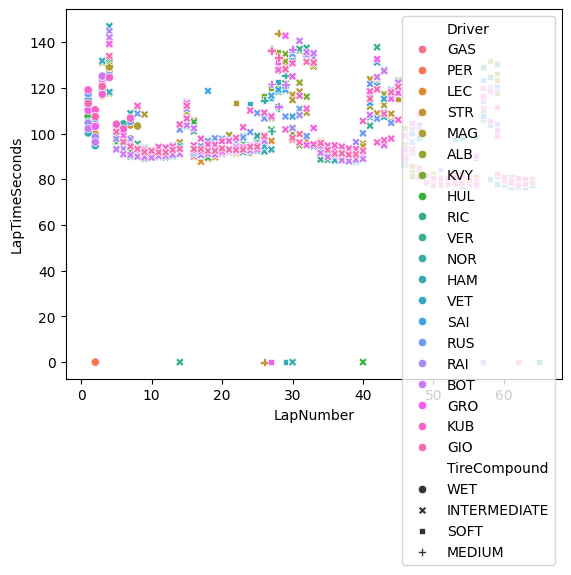

In [57]:
import seaborn as sns

# Assuming 'TireType' is the column with the tire information
sns.scatterplot(data=data_cleaned_with_weather, 
                y='LapTimeSeconds', 
                x='LapNumber', 
                hue='Driver', 
                style='TireCompound') 